In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

# data.features
print(X)

# data targets
print(y)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

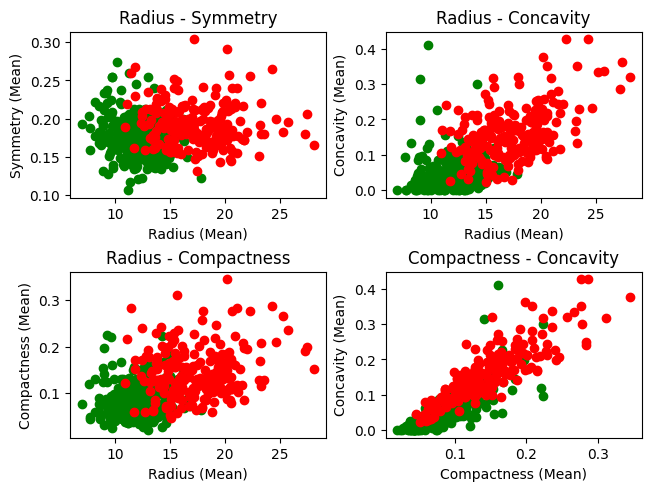

In [3]:
## Block 1: Comparison of geometric features of tumor cells

# Variables
mask = y['Diagnosis'] == 'M'
radius = X['radius1']
compactness = X['compactness1']
concavity = X['concavity1']
symmetry = X['symmetry1']
smoothness = X['smoothness1']

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, layout="constrained")

# Comparison: Radius - Symmetry
axs[0,0].scatter(
    radius[~mask],
    symmetry[~mask],
    color='green',
    label='Benign'
)
axs[0,0].scatter(
    radius[mask],
    symmetry[mask],
    color='red',
    label='Malign'
)
axs[0,0].set_xlabel('Radius (Mean)')
axs[0,0].set_ylabel('Symmetry (Mean)') 
axs[0,0].set_title('Radius - Symmetry')

# Comparison: Radius - Concavity
axs[0,1].scatter(
    radius[~mask],
    concavity[~mask],
    color='green',
    label='Benign'
)
axs[0,1].scatter(
    radius[mask],
    concavity[mask],
    color='red',
    label='Malign'
)
axs[0,1].set_xlabel('Radius (Mean)')
axs[0,1].set_ylabel('Concavity (Mean)')
axs[0,1].set_title('Radius - Concavity')

# Comparison: Radius - Compactness
axs[1,0].scatter(
    radius[~mask],
    compactness[~mask],
    color='green',
    label='Benign'
)
axs[1,0].scatter(
    radius[mask],
    compactness[mask],
    color='red',
    label='Malign'
)
axs[1,0].set_xlabel('Radius (Mean)')
axs[1,0].set_ylabel('Compactness (Mean)')
axs[1,0].set_title('Radius - Compactness')

# Comparison: Compactness - Concavity
axs[1,1].scatter(
    compactness[~mask],
    concavity[~mask],
    color='green',
    label='Benign'
)
axs[1,1].scatter(
    compactness[mask],
    concavity[mask],
    color='red',
    label='Malign'
)
axs[1,1].set_xlabel('Compactness (Mean)')
axs[1,1].set_ylabel('Concavity (Mean)')
axs[1,1].set_title('Compactness - Concavity')  

plt.show()

In [4]:
## Block 2: Entropy and information gain calculation for comparison of geometric features of tumor cells

def entropy(data, column):
    """
    Entropy = -sum(p_i * log2(p_i))
    """
    value_counts = data[column].value_counts()
    total = len(data)

    ent = 0
    for count in value_counts:
        if count > 0:
            probability = count / total
            ent -= probability * math.log2(probability)
    return ent

def information_gain(X, y, feature, target='Diagnosis', bins=10):
    """
    Information Gain = H(target) - H(target || feature)
    """

    h_target = entropy(y, target)

    combined = pd.DataFrame({
        'feature_binned': pd.cut(X[feature], bins=bins),
        target: y[target]
    })

    h_conditional = 0
    total = len(combined)
    for bin_value, group in combined.groupby('feature_binned', observed=True):
        weight = len(group) / total
        h_conditional += weight * entropy(group, target)

    return h_target - h_conditional

features = ['radius1', 'compactness1', 'concavity1', 'symmetry1', 'smoothness1']
print(f'Baseline Entropy of Diagnosis: {entropy(y, "Diagnosis"):.4f}\n')

for feature in features:
    ig = information_gain(X, y, feature)
    print(f'Information Gain for {feature}: {ig:.4f}')

Baseline Entropy of Diagnosis: 0.9526

Information Gain for radius1: 0.5183
Information Gain for compactness1: 0.3149
Information Gain for concavity1: 0.5018
Information Gain for symmetry1: 0.0929
Information Gain for smoothness1: 0.1137


Accuracy: 0.9006

              precision    recall  f1-score   support

      Benign       0.93      0.91      0.92       108
      Malign       0.85      0.89      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



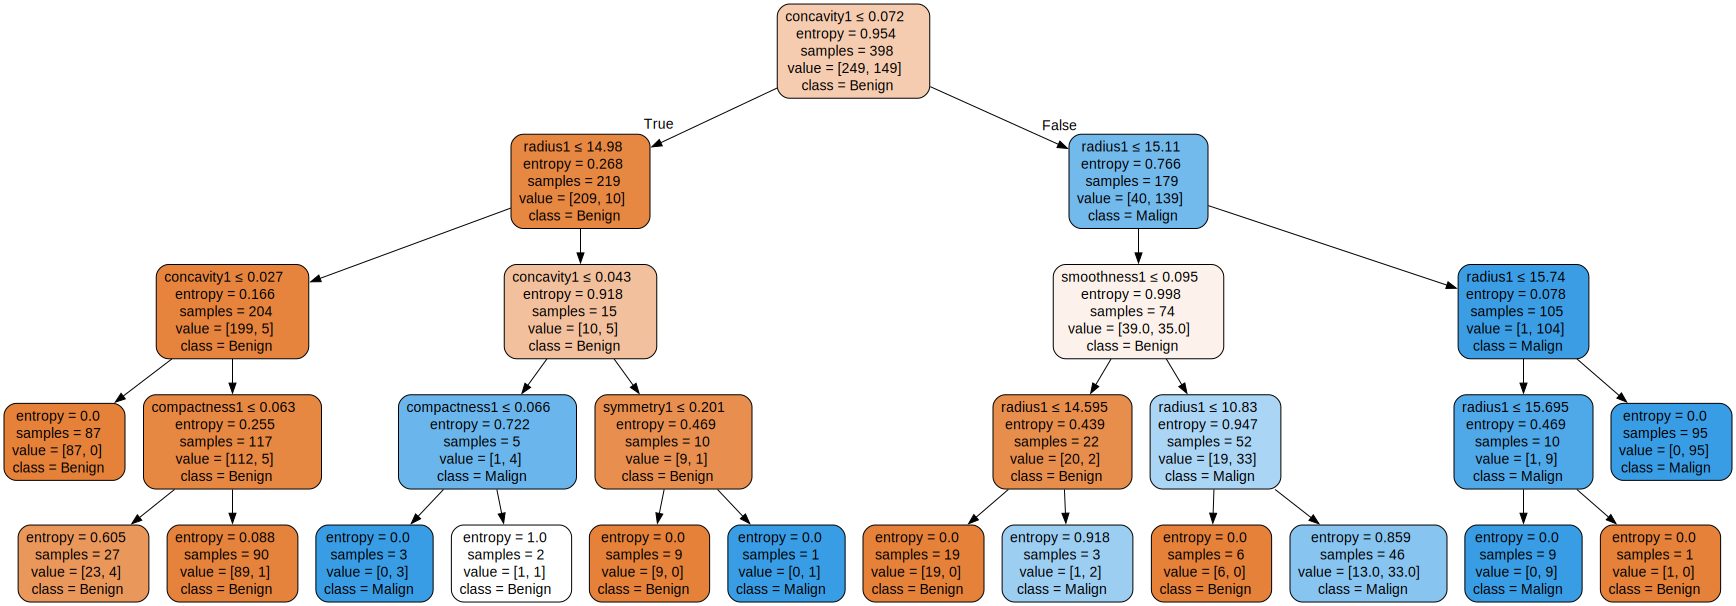

In [ ]:
# Block 3: Decision Tree Classifier for geometry

feature_columns = ['radius1', 'compactness1', 'concavity1', 'symmetry1', 'smoothness1']
X_selected = X[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y['Diagnosis'], test_size=0.3, random_state=42
)

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}\n')
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malign']))

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_columns,
    class_names=['Benign', 'Malign'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)